<br>
<center style="color:#180090; font-weight: bold; font-size: 3em">Esercitazione 5</center><br>
<center style="color:#555555; font-size: 2em; margin-bottom: 0.2cm;">Francesco Righini</center>
<center style="color:#555555; font-size: 1.5em">(931984)</center>

In [1]:
# importazione librerie
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
params = {'legend.fontsize': 'x-large', 'figure.figsize': (10, 6), 'axes.labelsize': 'x-large', 'axes.titlesize':'xx-large', 'xtick.labelsize':'x-large', 'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

<div style="color:#180090; font-size: 0.9cm; padding-top: 1em; font-weight:bold;">Esercizio 1</div>

<div style="color:#333333; font-size: 0.43cm; padding: 1em; background-color:#F5F5F5">
Tramite l'implementazione dell'algoritmo di Metropolis, calcolare la distanza media di un elettrone in un atomo di idrogeno.<br>
La funzione di probabilità nello spazio è data da $|\psi(\vec{x},t)|^2$ con
$$
\Psi_{n,l,m}(r,\theta,\phi)=
\sqrt{\left(\frac{2}{na_0}\right)^3 \frac{(n-l-1)!}{2n[(n+l)!]}}
e^{-r/na_0}\left(\frac{2r}{na_0}\right)^l L_{n-l-1}^{2l+1}\left(\frac{2r}{na_0}\right)
Y_l^m(\theta,\phi).
$$
<br>
In particolare ci si concentri nei casi $n=0, l=0, m=0$
$$
\Psi_{1,0,0}(r,\theta,\phi)=
\frac{a_0^{-3/2}}{\sqrt{\pi}} e^{-r/a_0} 
$$
e $n=2, l=1, m=0$
$$
\Psi_{2,1,0}(r,\theta,\phi)=
\frac{a_0^{-5/2}}{8}\sqrt{\frac{2}{\pi}} r e^{-r/2a_0} \cos(\theta).
$$    
</div>

<div style="color:#333333; font-size: 0.43cm; padding: 1em; background-color:#F5F5F5">Utilizzare come probabilità di transizione $T(\vec{x}|\vec{y})$ sia una distribuzione uniforme in una sfera di raggio $\delta$ attorno a $\vec{y}$, sia una distribuzione sferica gaussiana attorno a $\vec{y}$ (lo spazio è isotropo, quindi la direzione è uniforme, mentre il raggio dello spostamento è distribuito in modo gaussiano con valor medio nullo e deviazione standard $\sigma$).
<br><br>
Trovare i parametri $\delta$ e $\sigma$ in modo che l'accettazione $\alpha$ dell'algoritmo di Metropolis valga in media circa $0.5$.

</div>

<div style="font-size: 0.43cm;">
Scrivendo tutte le grandezze spaziali in unità di raggio di Bohr $a_0=4\pi\epsilon_0\hbar^2/m_e e^2=5.29 \times 10^{-11}\text{ m}$, per l'orbitale 1s si sono usati i seguenti valori:
$$\delta = 2.5 \qquad \bar{\alpha}=0.5097,$$
$$\sigma = 1.75 \qquad \bar{\alpha}=0.5017;$$
per l'orbitale 2p si sono usati i seguenti valori:
$$\delta = 6.6 \qquad \bar{\alpha}=0.5023,$$
$$\sigma = 4.5 \qquad \bar{\alpha}=0.5038.$$
</div>


<div style="font-size: 0.43cm;">
Per le seguenti simulazioni si sono usati $M=10^6$ punti suddivisi in $N=10^3$ blocchi, all'interno dei quali si sono calcolate le distanze medie dall'origine.
    
All'inizio di ogni simulazione, fatta eccezione per l'ultima, si è fatto girare l'algoritmo di Metropolis per $10^4$ step prima di cominciare a salvare le misure di posizione. In questo modo si riduce la  dipendenza dalle posizioni iniziali scelte arbitrariamente.
</div>

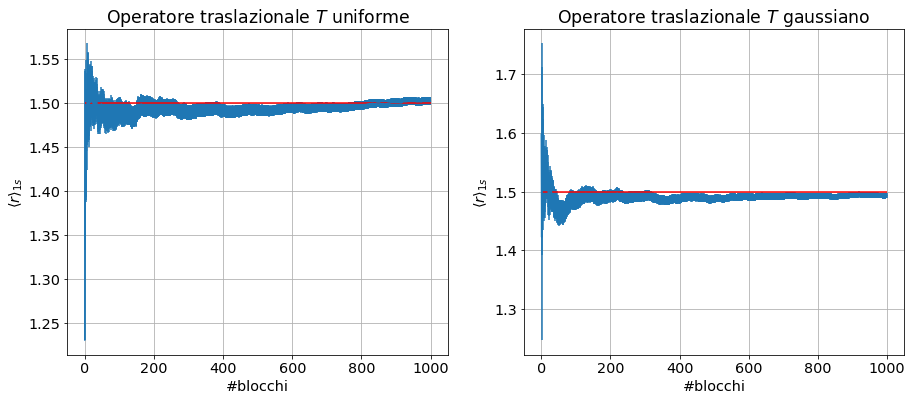

In [2]:
fig, axs = plt.subplots(1,2,figsize=(15,6))

ax = axs.flat[0]

media, sigma_media = np.loadtxt("results/1_1.dat", usecols=(0,1), delimiter=' ', unpack='true')
valor_vero = 1.5
x = np.arange(len(media))
ax.errorbar(x,media,yerr=sigma_media)
ax.hlines(valor_vero,0,len(media),"red");
ax.set(xlabel='#blocchi')
ax.set(ylabel=r'$\langle r \rangle_{1s}$')
ax.set(title=r"Operatore traslazionale $T$ uniforme")
ax.grid(True)

ax = axs.flat[1]

media, sigma_media = np.loadtxt("results/2_1.dat", usecols=(0,1), delimiter=' ', unpack='true')
valor_vero = 1.5
x = np.arange(len(media))
ax.errorbar(x,media,yerr=sigma_media)
ax.hlines(valor_vero,0,len(media),"red");
ax.set(xlabel='#blocchi')
ax.set(ylabel=r'$\langle r \rangle_{1s}$')
ax.set(title=r"Operatore traslazionale $T$ gaussiano")
ax.grid(True)

<div style="font-size: 0.43cm;">Utilizzando tutti i blocchi, si ottengono le stime:
    
- $\langle r \rangle_\text{unif}=1.502 \pm 0.005$
- $\langle r \rangle_\text{gauss}=1.493 \pm 0.005$

entrambe compatibili col valore esatto calcolato risolvendo l'integrale:
    $$\int \psi_{100}(\vec{x})\, r \, \psi_{100}(\vec{x}) = \frac{3}{2}a_0$$
</div>

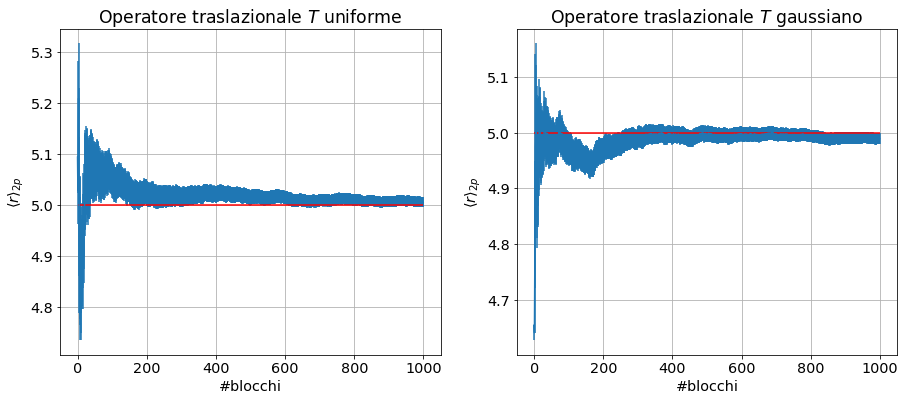

In [3]:
fig, axs = plt.subplots(1,2,figsize=(15,6))

ax = axs.flat[0]

media, sigma_media = np.loadtxt("results/1_2.dat", usecols=(0,1), delimiter=' ', unpack='true')
valor_vero = 5
x = np.arange(len(media))
ax.errorbar(x,media,yerr=sigma_media)
ax.hlines(valor_vero,0,len(media),"red");
ax.set(xlabel='#blocchi')
ax.set(ylabel=r'$\langle r \rangle_{2p}$')
ax.set(title=r"Operatore traslazionale $T$ uniforme")
ax.grid(True)

ax = axs.flat[1]

media, sigma_media = np.loadtxt("results/2_2.dat", usecols=(0,1), delimiter=' ', unpack='true')
valor_vero = 5
x = np.arange(len(media))
ax.errorbar(x,media,yerr=sigma_media)
ax.hlines(valor_vero,0,len(media),"red");
ax.set(xlabel='#blocchi')
ax.set(ylabel=r'$\langle r \rangle_{2p}$')
ax.set(title=r"Operatore traslazionale $T$ gaussiano")
ax.grid(True)

<div style="font-size: 0.43cm;">Utilizzando tutti i blocchi, si ottengono le stime:

- $\langle r \rangle_\text{unif}=5.005 \pm 0.010$
- $\langle r \rangle_\text{gauss}=4.989 \pm 0.010$

entrambe compatibili col valore esatto calcolato risolvendo l'integrale:
    $$\int \psi_{210}(\vec{x})\, r \, \psi_{210}(\vec{x}) = 5 a_0$$
</div>

<div style="font-size: 0.43cm;">
Si può quindi affermare che utilizzare probabilità di transizione uniforme o gaussiana è indifferente. Questo è dovuto al fatto che l'algoritmo di Metropolis richiede soltanto che $T(\vec{x}|\vec{y})$ sia simmetrico e che ogni punto possa essere visitato indipendentemente dalla consizione iniziale, caratteristiche che entrambe le $T$ soddisfano.
</div>

<div style="color:#333333; font-size: 0.43cm; padding: 1em; background-color:#F5F5F5">
Provare a porre delle condizioni iniziali lontane da quelle più probabili
</div>

<div style="font-size: 0.43cm;">
    Partendo molto lontani da dove la funzione d'onda è più concentrata (ad esempio 200 raggi di Bohr dal nucleo) e senza equilibrazione, si ha una lenta convergenza dell'algoritmo di Metropolis.
</div>

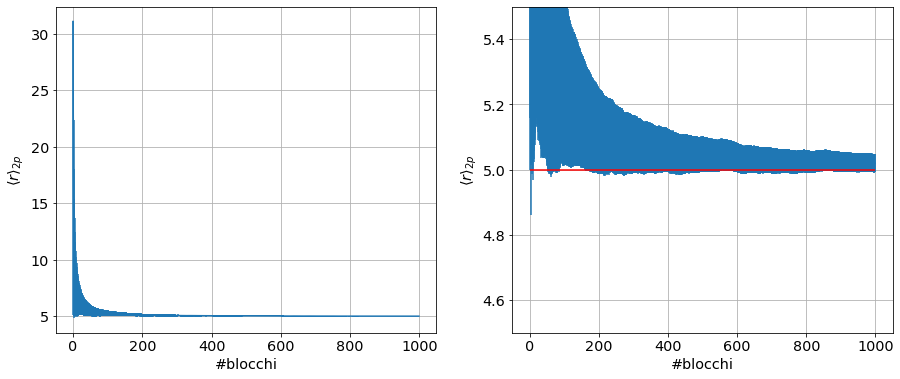

In [4]:
fig, axs = plt.subplots(1,2,figsize=(15,6))

ax = axs.flat[0]

media, sigma_media = np.loadtxt("results/3_2.dat", usecols=(0,1), delimiter=' ', unpack='true')
x = np.arange(len(media))
ax.errorbar(x,media,yerr=sigma_media)
ax.set(xlabel='#blocchi')
ax.set(ylabel=r'$\langle r \rangle_{2p}$')
ax.grid(True)

ax = axs.flat[1]

valor_vero = 5
x = np.arange(len(media))
ax.errorbar(x,media,yerr=sigma_media)
ax.hlines(valor_vero,0,len(media),"red");
ax.set(xlabel='#blocchi')
ax.set(ylabel=r'$\langle r \rangle_{2p}$')
ax.set(ylim=[4.5,5.5])
ax.grid(True)

<div style="font-size: 0.43cm;">
    Si nota dal grafico che all'inizio della simulazione l'incertezza è enorme: la convergenza dell'algoritmo di Metropolis non è immediata.<br> 
    Al termine della simulazione si ottiene la stima $\langle r \rangle=5.02 \pm 0.03$ che è comunque compatibile con il valore esatto.

</div>

<div style="color:#333333; font-size: 0.43cm; padding: 1em; background-color:#F5F5F5">
Visualizzare i punti utilizzati dall'algoritmo di Metropolis.
</div>

<div style="font-size: 0.43cm;">
Nel caso di orbitale 2p, si sono salvate le coordinate di tutti i punti visitati dall'algoritmo di Metropolis ($M=10^6$) con passo uniforme e le si è visualizzate in questo grafico tridimensionale.
</div>

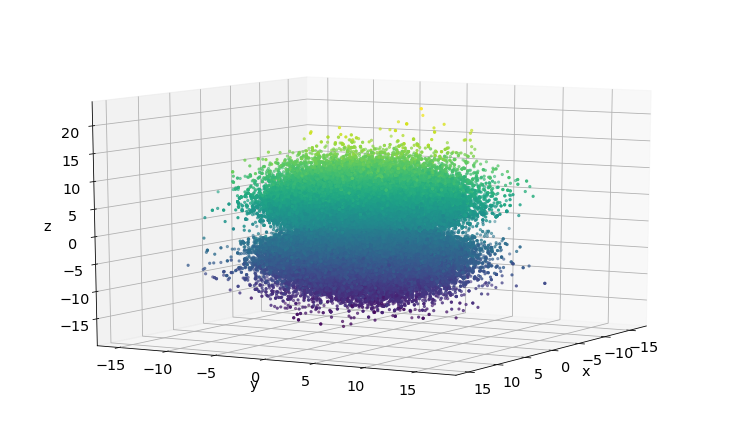

In [5]:
X,Y,Z = np.loadtxt("results/2p.dat", delimiter=' ', unpack='true')

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X, Y, Z, c=Z, marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(10, 30)
plt.show()